# Q2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

### lmplementaion of L-layer Neural Network from Scratch:

* Weight Initialization
* Forward Propagation
* Cost function
* Backward Propagation
* Parameters update
* inputs_ layer $\to$ [Linear $\to$ Relu or tanh]*(Hidden_layer nodes time) $\to$ [Linear $\to$ sigmoid]* (10 time) because we have 10 class!

### Weight Initialization:
np.random.randn( D, H) * 0.01

### Forward Propagation:

\begin{align}
Z_i = W_i a_{i-1} + b_i\\
a = activation(Z)\\
a_0 = inputs\\
\end{align}


### loss function:
\begin{align}
MSE=\frac1m\sum\limits_{i=1}^m (Y_i - \hat Y_i)^2
\end{align}

### Backward Propagation:
\begin{align}
\frac{\partial \mathbf{L}}{\partial \mathbf{w_2}} & = \frac{\partial \mathbf{L}}{\partial \mathbf{a_2}}\, \frac{\partial \mathbf{a_2}}{\partial \mathbf{z_2}}\,\frac{\partial \mathbf{z_2}}{\partial \mathbf{w_2}} \\
\frac{\partial \mathbf{L}}{\partial \mathbf{w_1}} & = \frac{\partial \mathbf{L}}{\partial \mathbf{a_2}}\, \frac{\partial \mathbf{a_2}}{\partial \mathbf{z_2}}\,\frac{\partial \mathbf{z_2}}{\partial \mathbf{a_1}}\,\frac{\partial \mathbf{a_1}}{\partial \mathbf{z_1}}\,\frac{\partial \mathbf{z_1}}{\partial \mathbf{w_1}} \\
\frac{\partial \mathbf{L}}{\partial \mathbf{b_1}} & = \frac{\partial \mathbf{L}}{\partial \mathbf{a_2}}\, \frac{\partial \mathbf{a_2}}{\partial \mathbf{z_2}}\,\frac{\partial \mathbf{z_2}}{\partial \mathbf{a_1}}\,\frac{\partial \mathbf{a_1}}{\partial \mathbf{z_1}}\,\frac{\partial \mathbf{z_1}}{\partial \mathbf{b_1}} \\
\frac{\partial \mathbf{L}}{\partial \mathbf{a_2}} & = \frac2m \vert \hat Y - Y \vert\\
(1) activation = tanh \to \frac{\partial \mathbf{a_i}}{\partial \mathbf{z_i}} & = 1 - (tanh)^2\\
(2) activation = ReLU \to \frac{\partial \mathbf{a_i}}{\partial \mathbf{z_i}} & = 
\begin{cases}
0&\text{if $x<0$}\\
1&\text{if $x>0$}\\
\text{undefined}&\text{if $x=0$}\\
\end{cases}\\
(3) activation = sigmoid \to \frac{\partial \mathbf{a_i}}{\partial \mathbf{z_i}} & = sigmoid(1-sigmoid)\\
\frac{\partial \mathbf{z_i}}{\partial \mathbf{w_i}} & = a_{prev}
\end{align}


### Parameters update(save weights):
\begin{align}
w_2 = w_2 - \mu \, \nabla w_2\\
w_1 = w_1 - \mu \, \nabla w_1\\
b = b - \mu \, \nabla b
\end{align}

* Use numpy.save to save the ndarray.
* For next use of your network, use numpy.load to load weights

In [2]:
X_train = pd.read_csv('Reduced_Train_Data.csv')
X_test = pd.read_csv('Reduced_Test_Data.csv')
Y_train = pd.read_csv('trainLabels.csv')
Y_test = pd.read_csv('testLabels.csv')

### Initialization

In [3]:
def InitWeight(dimoflayer, load_pretrained):
    np.random.seed(3)
    parameters={}
    L = len(dimoflayer)
    
    if(load_pretrained):  # If loading pretrained parameters
            for l in range(1, num_layers):
                parameters['W' + str(l)] = np.array(np.load("parametersW" + str(l) + ".npy"))
                parameters['b' + str(l)] = np.array(np.load("parametersb" + str(l) + ".npy"))

    for i in range(1, L):
        parameters["W"+str(i)] = np.random.randn( dimoflayer[i], dimoflayer[i-1])/np.sqrt(dimoflayer[i])
        parameters["b"+str(i)] = np.zeros((dimoflayer[i],1))
    return parameters

def initialize_velocity_momentum(parameters):
    v = {}
    num_layers = len(parameters) // 2  # Number of layers

    for i in range(1, num_layers + 1):
        v["dw" + str(i)] = np.zeros((parameters["W" + str(i)].shape[0], parameters["W" + str(i)].shape[1]))
        v["db" + str(i)] = np.zeros((parameters["b" + str(i)].shape[0], parameters["b" + str(i)].shape[1]))
        
        
    return v


### Forward and Backward Propagation

In [4]:
def forward(Z, activation):
 
    # Activation Function 
    if activation== "tanh":
        A= np.tanh(Z)
        
    if activation== "relu":
        A = np.maximum(0,Z)
    
    # Activation Function 
    if activation== "sigmoid":
        A=1/(1+np.exp(-Z))
        
    if activation== "softmax" :
        A = np.exp(Z) / np.sum(np.exp(Z))
      
    return A


def forwardprop(X, parameters, dimoflayer, act_func):
    W1 = parameters["W"+str(1)]
    b1 = parameters["b"+str(1)]
    h1 = np.dot(W1,X)+ b1
    A1 = forward(h1,act_func)
    
    W2 = parameters["W"+str(2)]
    b2 = parameters["b"+str(2)]
    h2 = np.dot(parameters["W"+str(2)],A1)+parameters["b"+str(2)]
    A2 = forward(h2,'sigmoid')
    
    caches = [(X,W1,b1,h1),(A1,W2,b2,h2)]
    
    return A2, caches
    

def compute_loss(y_hat, Y):
    
    m = Y.shape[0]
    cnt = 0
    label = np.zeros([10,m])
    for i in Y:
        label[i,cnt] = 1
        cnt += 1

    predicted = np.array(pd.DataFrame(y_hat).idxmax(axis=0))

    #MSE = (1/m) * np.sum((Y-np.argmax(y_hat))**2)
    
    costt = np.add(  np.multiply(label, np.log(y_hat)) ,  np.multiply(1-label, np.log(1-y_hat))  ) 
    cost = (-1/m) * np.sum(costt)
    
    cnt = 0
    for i in Y:
        if(i == predicted[i]):
            cnt += 1
    
    return cost, label, cnt/m*100
    
def backward(dA, Z,activation):

    # Computing derivative of Cost wrt Z
    
    # dA, Z, 
    if activation == "relu":
        dZ = np.array(dA, copy=True)
        dZ[Z <=0] =0
        
    if activation == "tanh":
        dZ = (1- (np.tanh(Z))**2)*dA
        
    if activation == "sigmoid":
        s = 1/(1+np.exp(-Z))
        dZ =  s * (1-s)*dA
        
    if activation == "softmax":
        s = np.exp(Z) / np.sum(np.exp(Z))
        dZ = s * (1-s) *dA
        
        
  
    return dZ
    
    
    
     
def backwardprop(y_hat, Y, Y_train, caches, dimoflayer, act_func):
    
    AL = y_hat 

    grads={}
    m= Y.shape[1]
    
    # Intializing Backpropagation
    dAL = -(np.divide(Y,AL) - np.divide(1-Y, 1-AL))
    A1 = caches[1][0]
    W2 = caches[1][1]
    h2 = caches[1][3]
    dA2 = backward(dAL, h2, 'sigmoid')
    grads["dW"+str(2)] = (1/A1.shape[1])*np.dot(dA2, A1.transpose())
    grads["db"+str(2)] = (1/A1.shape[1])*((dAL)).sum()
    
    X = caches[0][0]
    h1 = caches[0][3]
    dA1 = np.dot(W2.transpose(), dA2)
    grads["dW"+str(1)] = (1/X.shape[1])*np.dot(dA1*backward(A1,h1, act_func), X.transpose())
    grads["db"+str(1)] = (1/X.shape[1])*(dA1*backward(A1,h1, act_func)).sum()
          
    return grads
    
   
        
            

def SaveWeight(params, grads, learning_rate,v, beta):
    '''
    parameters: dict of (W1,b1, W2,b2,...)
    grads: Gradients of(A,W,b) stored while Backpropagation (dA,dW,db)
    
    returns: updated parameters
    '''
    # As each layer has 2 parameters (W,b)
    L=len(params) // 2
    
    for l in range(L):
        v["dw" + str(l+1)] = beta*v["dw" + str(l+1)] + (1 - beta)*grads["dW" + str(l+1)]
        v["db" + str(l+1)] = beta*v["db" + str(l+1)] + (1 - beta)*grads["db" + str(l+1)]
        params["W" + str(l+1)] -= (learning_rate * v["dw" + str(l+1)])
        params["b" + str(l+1)] -= (learning_rate * v["db" + str(l+1)])
        
        
    return params    
    

### Neural Network

In [5]:
import math

def cross_validation(df,per):
    data = df.sample(frac=1)
    percent = int(data.shape[0]*per/100)
    X_train = data.iloc[0:percent,:]
    X_test = data.iloc[percent:-1,:]
    return X_train,X_test


def NeuralNetwork(X_t, Y, hd_nod, act_func, num_itr, learning_rate,load_pretrained=False):
    seed = 10
    
    dimoflayer=[X_t.shape[1], hd_nod, 10]

    #split data
    X = X_t.copy()
    X['y'] = Y['9']
    X_train, X_val = cross_validation(X,80)
    Y_train = np.array(X_train['y'])
    Y_val = np.array(X_val['y'])
    del X_train['y']
    del X_val['y']
    
    parameters = InitWeight(dimoflayer,load_pretrained)
    v = initialize_velocity_momentum(parameters)
    costs= []
    accs = []
    costs_val= []
    accs_val = []
    iterate = np.arange(num_itr)
    print('is loading...')
    #momentum Gradient Descent
    for i in range(num_itr):
        
        permutation = list(np.random.permutation(X_train.shape[0]))
        shuffled_x = X_train.iloc[ permutation, :]
        shuffled_y = Y_train[ permutation]

                 
        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID
        y_hat, caches = forwardprop(shuffled_x.transpose(), parameters, dimoflayer, act_func)
            
        # Compute Cost
        cost , new_Y, acc = compute_loss(y_hat, shuffled_y)
        

        # Backward propagation
        grads = backwardprop(y_hat, new_Y, shuffled_y,caches, dimoflayer, act_func)

        # Update Parameters
        parameters = SaveWeight(parameters, grads, learning_rate, v, 0.9)

        y_hat, caches = forwardprop(X_val.transpose(), parameters, dimoflayer, act_func)
        cost_val , new_Y, acc_val = compute_loss(y_hat, Y_val)
        

        costs.append(cost)
        accs.append(acc)
        costs_val.append(cost_val)
        accs_val.append(acc_val)
        if(i%100 == 0):
            print("Cost after epoch %i: %f" % (i, sum(costs)/len(costs)))
            print("Cost_validation after epoch %i: %f" % (i, sum(costs_val)/len(costs_val)))
            print("Train accuracy is %i" % (acc))
            print("validation accuracy is %i" % (acc_val))

        # The below code saves the parameters after each epoch
        for k in range(1, len(dimoflayer)):
            learning_rate = learning_rate*0.1
            np.save("parametersW%i.npy" % (k), parameters["W" + str(k)])
            np.save("parametersb%i.npy" % (k), parameters["b" + str(k)])

       
    # Ploting the Cost
    fig = plt.figure("neuralnetwork", figsize=(20, 8))
    plt.subplot(121)
    plt.plot(iterate,costs, label="training")
    plt.plot(iterate,costs_val, label="validation")
    plt.xlabel("n iteration")
    plt.ylabel("cost")
    plt.legend(loc="upper right")
    
    plt.subplot(122)
    plt.plot(iterate,accs, label="training")
    plt.plot(iterate,accs_val, label="validation")
    plt.xlabel("n iteration")
    plt.ylabel("Accuracy")
    plt.legend(loc="upper right")
    
    return parameters
    

In [6]:
# Defining predict function
def predict(X, Y, parameters,act_func,hd_node):
    dimoflayer=[X.shape[1], hd_node, 10]
    Y = Y.rename(columns = {"9":"y"}) 
    m= X.shape[1]
    
    
    
    # forward propagation
    y_hat, caches = forwardprop(X.transpose(), parameters, dimoflayer,act_func)
    loss , new_Y, acc = compute_loss(y_hat, Y['y'])
          
     
    return(acc, loss)

is loading...
Cost after epoch 0: 12.931083
Cost_validation after epoch 0: 12.648109
Train accuracy is 10
validation accuracy is 10


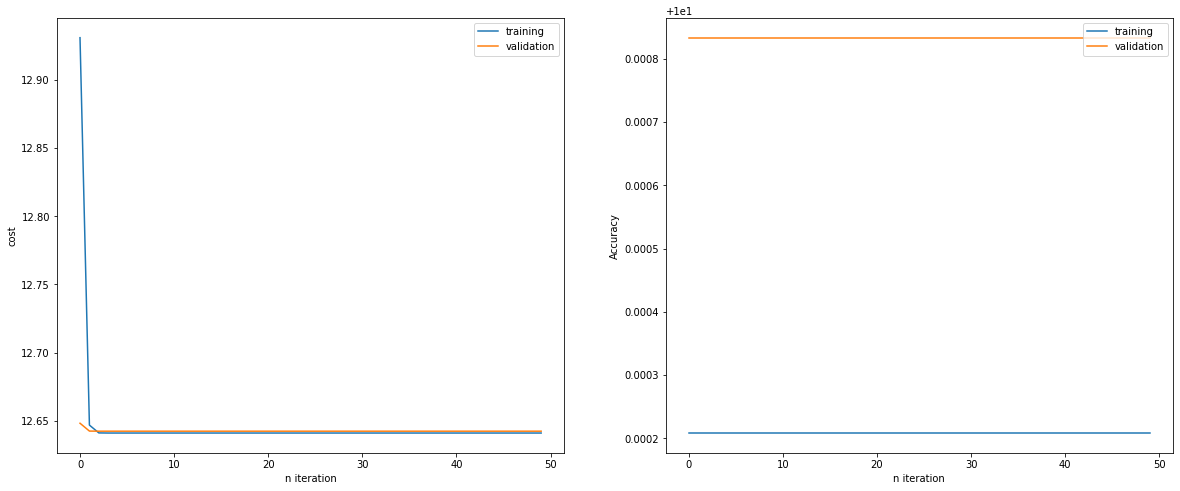

In [18]:
# Model Configuration
# len(layer_dims), will be no. of layers with Input & Output layers

learning_rate= 0.01

X = X_train - X_train.sum(axis=0)
Xtrain = X/np.sqrt(X**2)

# No. of Gradient Descent Iterations
num_itr = 50
parameters = NeuralNetwork(Xtrain, Y_train, 300, "tanh", num_itr, learning_rate)

In [8]:
accuracy, loss = predict(X_test, Y_test, parameters, 'tanh', 300)
print(accuracy,loss)

0.0 nan


is loading...
Cost after epoch 0: 6.929932
Cost_validation after epoch 0: 6.800064
Train accuracy is 29
validation accuracy is 10
Cost after epoch 100: 6.799442
Cost_validation after epoch 100: 6.797645
Train accuracy is 10
validation accuracy is 10
Cost after epoch 200: 6.798781
Cost_validation after epoch 200: 6.797633
Train accuracy is 0
validation accuracy is 10
Cost after epoch 300: 6.798559
Cost_validation after epoch 300: 6.797629
Train accuracy is 9
validation accuracy is 10
Cost after epoch 400: 6.798447
Cost_validation after epoch 400: 6.797627
Train accuracy is 0
validation accuracy is 10


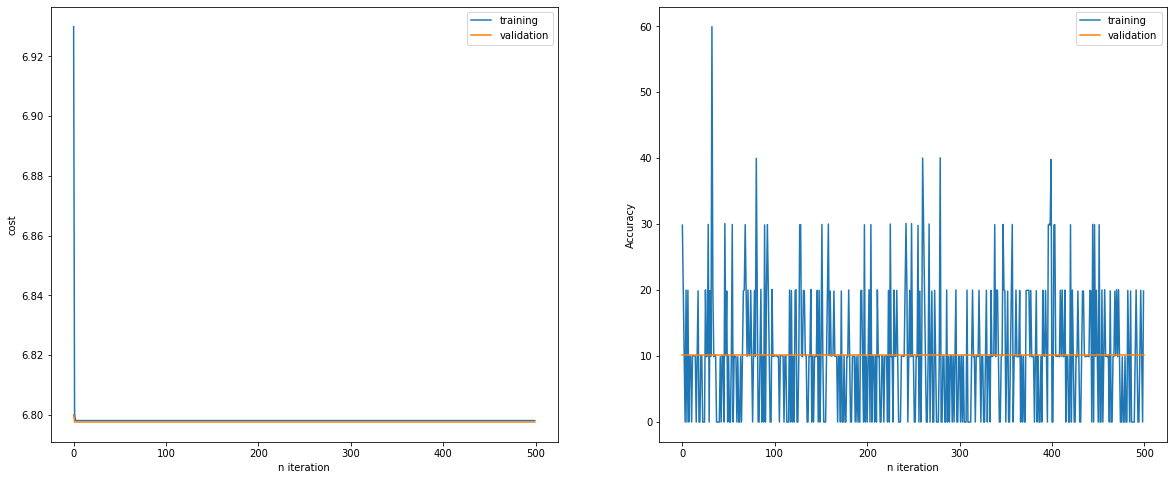

In [40]:
# Model Configuration
# len(layer_dims), will be no. of layers with Input & Output layers

x = np.array(X_train) - np.array(X_train.sum(axis = 0)/X_train.shape[0])
X_train= pd.DataFrame(x/np.sqrt((x**2).sum(axis = 0)))*100000

parameters = NeuralNetwork(X_train, Y_train, 300, "relu", 500, 0.0010)

In [41]:
accuracy, loss = predict(X_test, Y_test, parameters, 'relu', 300)
print(accuracy,loss)

10.00100010001 6.854596366698442


is loading...
Cost after epoch 0: 6.931457
Cost_validation after epoch 0: 6.924359
Train accuracy is 10
validation accuracy is 9


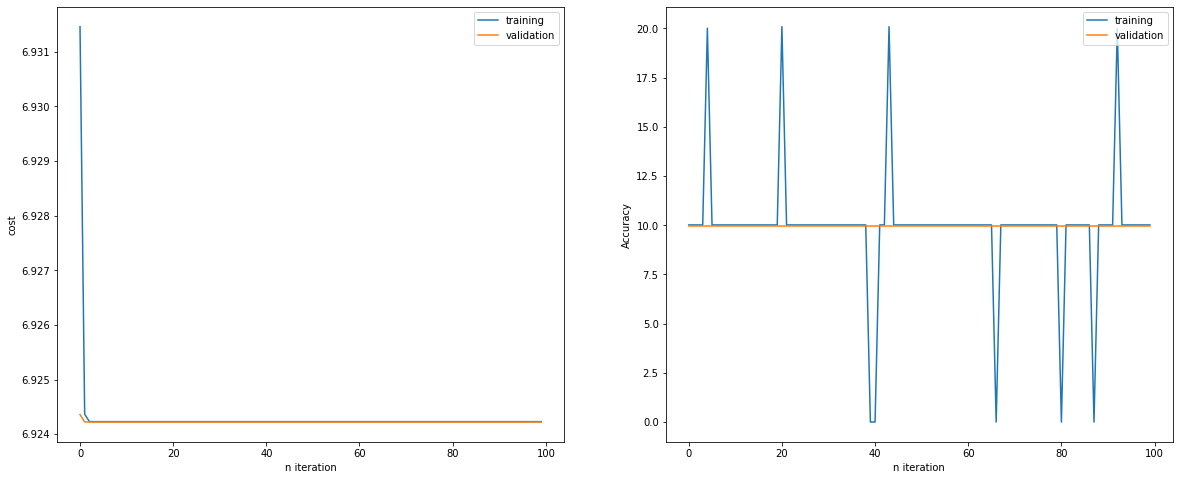

In [47]:
# Model Configuration
# len(layer_dims), will be no. of layers with Input & Output layers


parameters = NeuralNetwork(X_train, Y_train, 150, "relu", 100, 0.001)

In [48]:
accuracy, loss = predict(X_test, Y_test, parameters, 'relu', 150)
print(accuracy,loss)

10.00100010001 6.92422564204443


is loading...
Cost after epoch 0: 6.931649
Cost_validation after epoch 0: 6.930969
Train accuracy is 0
validation accuracy is 20


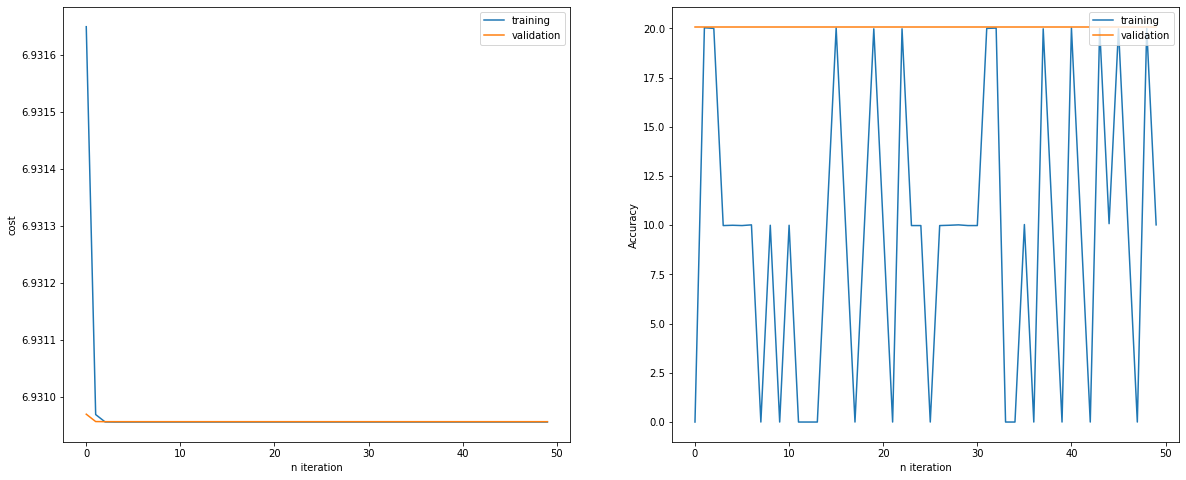

In [50]:
x = np.array(X_train) - np.array(X_train.sum(axis = 0)/X_train.shape[0])
X_train= pd.DataFrame(x/np.sqrt((x**2).sum(axis = 0)))*100000

parameters = NeuralNetwork(X_train, Y_train, 100, "relu", 50, 0.0001)

In [52]:
accuracy, loss = predict(X_test, Y_test, parameters, 'relu', 100)
print(accuracy,loss)

10.00100010001 6.930958588598713


is loading...
Cost after epoch 0: 6.931478
Cost_validation after epoch 0: 6.925074
Train accuracy is 9
validation accuracy is 0


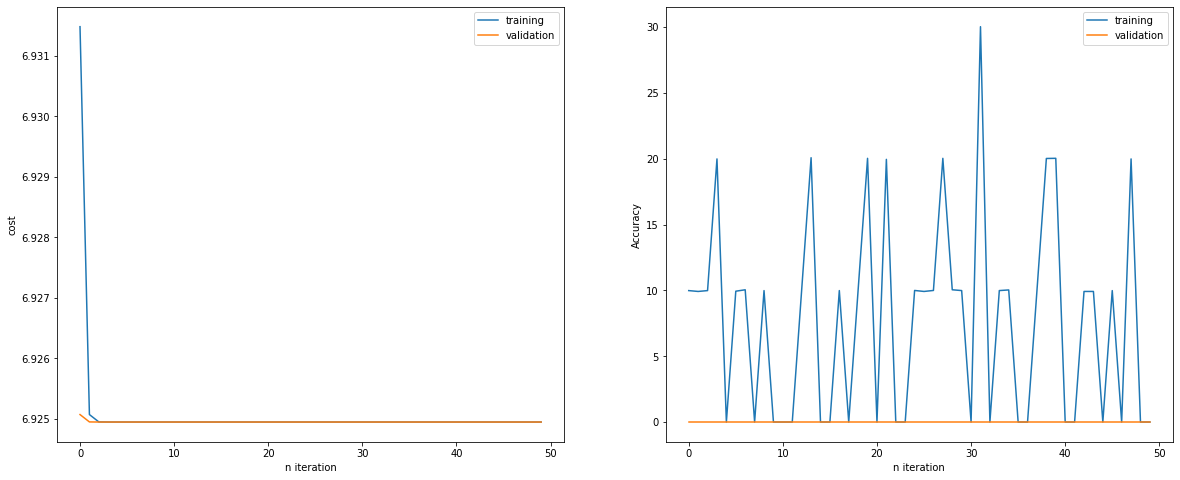

In [53]:
parameters = NeuralNetwork(X_train, Y_train, 150, "tanh", 50, 0.001)

In [55]:
accuracy, loss = predict(X_test, Y_test, parameters, 'tanh', 150)
print(accuracy,loss)

10.00100010001 6.925022516814619


is loading...
Cost after epoch 0: 6.931614
Cost_validation after epoch 0: 6.924708
Train accuracy is 0
validation accuracy is 9


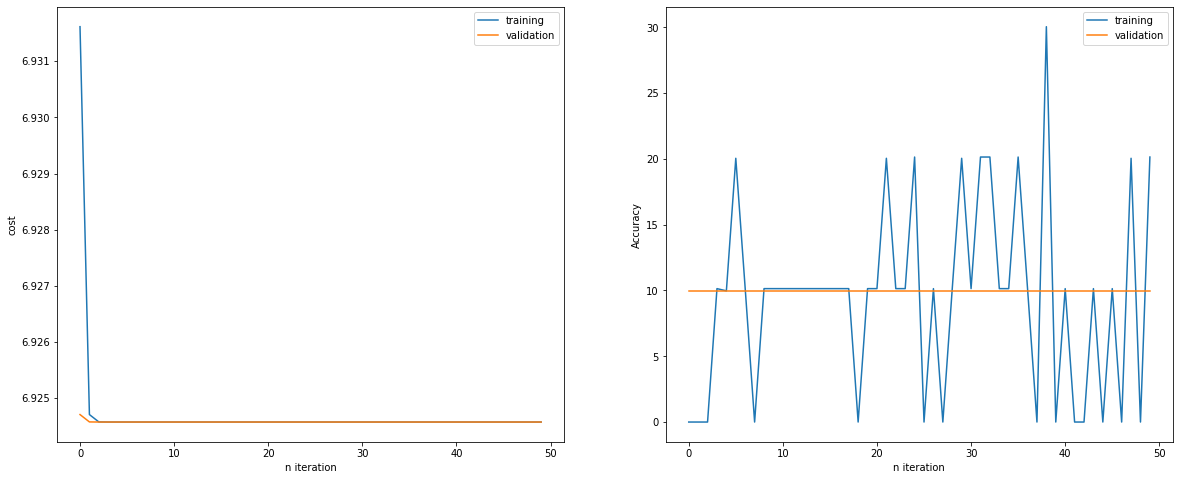

In [58]:
parameters = NeuralNetwork(X_train, Y_train, 100, "tanh", 50, 0.001)

In [59]:
accuracy, loss = predict(X_test, Y_test, parameters, 'tanh', 100)
print(accuracy,loss)

9.99099909990999 6.924573008750441


After 2 weeks of working on this data set, i can't solve the problem "why can not learn?"